# King County Housing


In [8]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [9]:
import missingno as msno

### Reading the data

In [10]:
df = pd.read_csv("housing.csv")

In [11]:
from IPython.display import display, HTML
display(HTML("<style>.jp-OutputArea-output {display:flex}</style>"))

# The client: Larry Sanders (Buyer)

Characteristics: 

- Wants a waterfront
- Has limited budget
- Wants a nice and isolated but central neighborhood without children (has two kids of his own)

#### **Features of interest**

The following features were deemed most suitable for the analysis in the context of the clients requirements.

- *Price*:</br> Client has a limited budget, cannot afford expensive houses

- *Date*: In case a house was sold several times within a short time span, if it's suitable for the client, that house, instead of a general area, may be recommended to the client

**Wants for himself**
- *Waterfront*:</br> Client wants to live at a waterfront
  
- *sqft_living*:</br> Client has children and might want a sizeable house</br>
- *floors*:</br> Client has children and might want a sizeable house with several floors
- *bedrooms*: </br>Client has children and might want mulitple bedrooms
- *bathrooms*:</br> Client has children and might want more bathrooms, especially if the house is larger

**Wants from the neighbourhood**

- *grade*:</br> Client wants to live in a nice neighbourhood. The grade might be a sign of a well-off area

- *yr_built*:</br> The older the houses, the more central and nicer they could potentially be for the client
- *sqft-living15*:</br> The lower the house size, the larger the chance that the neighbourhood has few other families with kids living nearby
- *sqft-lot15*:</br> The bigger the lot size, the more separated and isolated the neighbourhood, which is what the client wants
- *zipcode*:</br> The client wants to live more centrally, but not too centrally. Zipcode will help idenfity such areas.
- *lat*:</br> The client wants to live more centrally, but not too centrally. Latitude will help idenfity such areas.
- *long*:</br> The client wants to live more centrally, but not too centrally. Longitude will help idenfity such areas.

In [12]:
df.columns

Index(['date', 'price', 'house_id', 'id', 'id.1', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Hypotheses

1. The larger the sq. footage, the pricier the home
2. The more bedrooms there are, the pricier the home (total and $/sq. foot)
3. The more bathrooms per bedroom there are, the pricier the home is (total and $/sq. foot)
4. The more central the home, the pricier it is (total and $/sq. foot)

   a. In terms of Zipcode </br>
   b. In terms of lat/long

5. If there is a waterfront, the home will be pricier (total and $/sq. foot)
6. The older the home, the more central it is but also pricier
7. Certain areas have better graded homes than others
8. The better the grading, the pricier the home
9. The larger the average lot size of the closest 15 neighbours, the more isolated the area
10. The smaller the average home area of the closest 15 neighbours, the fewer kids they'll have, the more central it is

### Examining data structure and data types

In [13]:
df2 = df[["date","price","waterfront","sqft_living","floors","bedrooms","bathrooms","grade","yr_built","sqft_living15","sqft_lot15",
          "zipcode","lat","long"]]

In [14]:
df2.shape

(21597, 14)

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   waterfront     19206 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   floors         21597 non-null  float64
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   grade          21597 non-null  int64  
 8   yr_built       21597 non-null  int64  
 9   sqft_living15  21597 non-null  float64
 10  sqft_lot15     21597 non-null  float64
 11  zipcode        21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
dtypes: float64(10), int64(3), object(1)
memory usage: 2.3+ MB


In [16]:
df2.head(10)

date       price  waterfront  sqft_living  floors  bedrooms  \
0  2014-10-13  221900.000         NaN     1180.000   1.000     3.000   
1  2014-12-09  538000.000       0.000     2570.000   2.000     3.000   
2  2015-02-25  180000.000       0.000      770.000   1.000     2.000   
3  2014-12-09  604000.000       0.000     1960.000   1.000     4.000   
4  2015-02-18  510000.000       0.000     1680.000   1.000     3.000   
5  2014-05-12 1230000.000       0.000     5420.000   1.000     4.000   
6  2014-06-27  257500.000       0.000     1715.000   2.000     3.000   
7  2015-01-15  291850.000       0.000     1060.000   1.000     3.000   
8  2015-04-15  229500.000       0.000     1780.000   1.000     3.000   
9  2015-03-12  323000.000       0.000     1890.000   2.000     3.000   

   bathrooms  grade  yr_built  sqft_living15  sqft_lot15  zipcode    lat  \
0      1.000      7      1955       1340.000    5650.000    98178 47.511   
1      2.250      7      1951       1690.000    7639.000    98125 47.721   
2      1.000      6      1933       2720.000    8062.000    98028 47.738   
3      3.000      7      1965       1360.000    5000.000    98136 47.521   
4      2.000      8      1987       1800.000    7503.000    98074 47.617   
5      4.500     11      2001       4760.000  101930.000    98053 47.656   
6      2.250      7      1995       2238.000    6819.000    98003 47.310   
7      1.500      7      1963       1650.000    9711.000    98198 47.410   
8      1.000      7      1960       1780.000    8113.000    98146 47.512   
9      2.500      7      2003       2390.000    7570.000    98038 47.368   

      long  
0 -122.257  
1 -122.319  
2 -122.233  
3 -122.393  
4 -122.045  
5 -122.005  
6 -122.327  
7 -122.315  
8 -122.337  
9 -122.031

At first glance, it is evident that there are quite many observations (over 20,000) and all variables seem to be numerical. On closer inspection, though, the variables "waterfront" and "yr_built", as well as the zipcode, can in fact be classified as categorical variables. 

In [28]:
df2["waterfront"].unique(), df2["yr_built"].unique(), df2["zipcode"].unique()

(array([nan,  0.,  1.]),
 array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
        1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
        1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
        1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
        1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
        1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
        1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
        1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
        1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
        1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
        2015, 1934, 1938, 1919, 1906, 1935], dtype=int64),
 array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
        98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
        98040, 98092, 98030, 98119

Exploring missing values luckily yields the following: only the waterfront feature seems to be missing some information. Missing values are imputed in another section below.

In [16]:
df2.isna().sum()

date                0
price               0
waterfront       2391
sqft_living         0
floors              0
bedrooms            0
bathrooms           0
grade               0
yr_built            0
sqft_living15       0
sqft_lot15          0
zipcode             0
lat                 0
long                0
dtype: int64

In [17]:
df2.describe()

price  waterfront  sqft_living    floors  bedrooms  bathrooms  \
count   21597.000   19206.000    21597.000 21597.000 21597.000  21597.000   
mean   540296.574       0.008     2080.322     1.494     3.373      2.116   
std    367368.140       0.087      918.106     0.540     0.926      0.769   
min     78000.000       0.000      370.000     1.000     1.000      0.500   
25%    322000.000       0.000     1430.000     1.000     3.000      1.750   
50%    450000.000       0.000     1910.000     1.500     3.000      2.250   
75%    645000.000       0.000     2550.000     2.000     4.000      2.500   
max   7700000.000       1.000    13540.000     3.500    33.000      8.000   

          grade  yr_built  sqft_living15  sqft_lot15   zipcode       lat  \
count 21597.000 21597.000      21597.000   21597.000 21597.000 21597.000   
mean      7.658  1971.000       1986.620   12758.284 98077.952    47.560   
std       1.173    29.375        685.230   27274.442    53.513     0.139   
min       3.000  1900.000        399.000     651.000 98001.000    47.156   
25%       7.000  1951.000       1490.000    5100.000 98033.000    47.471   
50%       7.000  1975.000       1840.000    7620.000 98065.000    47.572   
75%       8.000  1997.000       2360.000   10083.000 98118.000    47.678   
max      13.000  2015.000       6210.000  871200.000 98199.000    47.778   

           long  
count 21597.000  
mean   -122.214  
std       0.141  
min    -122.519  
25%    -122.328  
50%    -122.231  
75%    -122.125  
max    -121.315

**Creating new variables**

While existing variables already provide a good starting point for picking out suitable houses for the client, additional information can be extracted from the columns to create new variables. 

For example, it makes sense to normalize the price of the house based on its sq. footage, since larger houses tend to cost more by default. By dividing the price by sq. footage, it is easier to compare properties and identify those that are priced appropriately given the area they are located in. For instance, some bigger houses may costs a lot less in certain areas than elsewhere, so normalizing the price with respect to house size adds additional insights into the comparative value of the property. 

In [43]:
df2.eval("price_per_sqft = price/sqft_living", inplace=True)

The "bathrooms" columns contains values that are decimal numbers and not integers. In this step, the variable is rounded up (e.g. if 1.75) or down (e.g. if 2.25).

In [44]:
df2["bathrooms"] = df2["bathrooms"].apply(lambda x: int(x) if x - int(x) < 0.5 else int(x) + 1)

In [45]:
df2["bathrooms"]

0        1
1        2
2        1
3        3
4        2
        ..
21592    3
21593    3
21594    1
21595    3
21596    1
Name: bathrooms, Length: 21597, dtype: int64

Another variable was created, namely bedrooms per bathroom. The idea for this new variable is to examine whether houses with a small number of bathrooms compared to the number of bedrooms are less pricey. Given that the client has two children, too few bathrooms may seem unattractive.

In [46]:
df2.eval("bedrooms_per_bathroom = bedrooms/bathrooms", inplace = True)

In [47]:
df2["zipcode"] = df2["zipcode"].astype(str)

In [48]:
df2[df2["zipcode"].str.startswith("980")]["zipcode"].unique()

array(['98028', '98074', '98053', '98003', '98038', '98007', '98019',
       '98002', '98040', '98092', '98030', '98052', '98027', '98058',
       '98001', '98056', '98023', '98070', '98042', '98008', '98059',
       '98004', '98005', '98034', '98075', '98010', '98032', '98045',
       '98077', '98065', '98029', '98006', '98022', '98033', '98024',
       '98011', '98031', '98072', '98014', '98055', '98039'], dtype=object)

In [49]:
df2[df2["zipcode"].str.startswith("981")]["zipcode"].unique()

array(['98178', '98125', '98136', '98198', '98146', '98115', '98107',
       '98126', '98103', '98133', '98119', '98112', '98117', '98166',
       '98148', '98105', '98122', '98144', '98116', '98118', '98199',
       '98102', '98108', '98168', '98177', '98109', '98155', '98106',
       '98188'], dtype=object)

Given that the client wants to live in certain areas, it was necessary to distinguish between different types of King County regions. The client wants to live centrally, yet more isolated, which is why the zipcodes were merged into three larger regions - Urban outskirts, Urban center and Suburban areas - which will make the analysis more assessable later on.

In [50]:
df2["neighbourhood"] = df2["zipcode"].apply(lambda x: "Urban_outskirts" if x in ["98177","98178","98160","98155",
                                                       "98136","98116","98146","98166",
                                                       "98188","98199","98168","98117"
                                                       "98158","98198","98156","98148"] 
                                            else "Urban_central" if x in ["98133","98107","98103",
                                                                          "98125","98115","98105","98119",
                                                    "98109","98102","98112","98104","98122",
                                                   "98144","98134","98126","98106","98108","98118"] 
                                            else "Suburban")

In [51]:
df2["neighbourhood"].value_counts()

neighbourhood
Suburban           13177
Urban_central       5263
Urban_outskirts     3157
Name: count, dtype: int64

The price variable was sorted into quantiles so this piece of information can be portrayed more easily and in a more comprehensive way on various plots in later sections below.

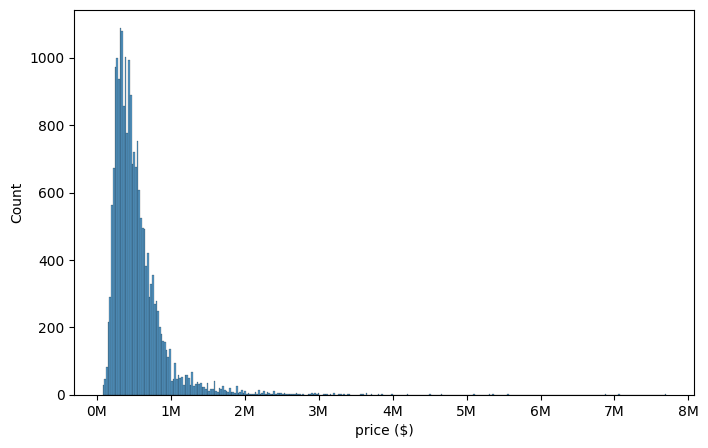

In [92]:
g = sns.histplot(data = df2, x = "price")
g.set_xlabel("price ($)")
g.set_xticklabels([f"{i-1}M" for i in range(10)])
plt.show()

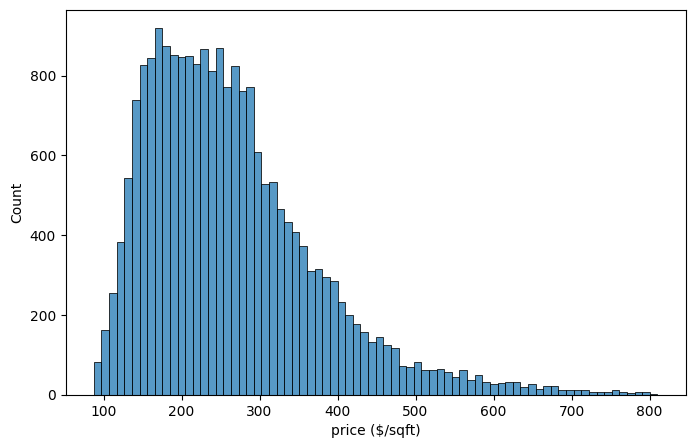

In [96]:
g = sns.histplot(data = df2, x = "price_per_sqft")
g.set_xlabel("price ($/sqft)")
plt.show()

Since the "price" variable had some extreme values, the "price/sqft" variable was chosen for that purpose.

In [52]:
df2 = pd.concat([df2, pd.qcut(df2["price_per_sqft"], q = 5, labels = [1,2,3,4,5])], axis = 1)

In [53]:
df2.columns.values[-1] = "price_per_sqft_cat"

### **Testing hypotheses**

In this first, basic step, the correlation between all numberical variables was first examined, both in a table and a heatmap.

In [54]:
df2_num = df2[["price","price_per_sqft","sqft_living","floors","bedrooms","bathrooms","bedrooms_per_bathroom","grade","sqft_living15","sqft_lot15"]]

In [55]:
df2_num.corr()

price  price_per_sqft  sqft_living  floors  bedrooms  \
price                  1.000           0.556        0.702   0.257     0.309   
price_per_sqft         0.556           1.000       -0.091   0.005    -0.206   
sqft_living            0.702          -0.091        1.000   0.354     0.578   
floors                 0.257           0.005        0.354   1.000     0.178   
bedrooms               0.309          -0.206        0.578   0.178     1.000   
bathrooms              0.476          -0.118        0.721   0.511     0.491   
bedrooms_per_bathroom -0.228           0.006       -0.320  -0.370     0.173   
grade                  0.668           0.125        0.763   0.459     0.357   
sqft_living15          0.585           0.039        0.756   0.280     0.393   
sqft_lot15             0.083          -0.059        0.184  -0.011     0.031   

                       bathrooms  bedrooms_per_bathroom  grade  sqft_living15  \
price                      0.476                 -0.228  0.668          0.585   
price_per_sqft            -0.118                  0.006  0.125          0.039   
sqft_living                0.721                 -0.320  0.763          0.756   
floors                     0.511                 -0.370  0.459          0.280   
bedrooms                   0.491                  0.173  0.357          0.393   
bathrooms                  1.000                 -0.690  0.646          0.557   
bedrooms_per_bathroom     -0.690                  1.000 -0.396         -0.300   
grade                      0.646                 -0.396  1.000          0.714   
sqft_living15              0.557                 -0.300  0.714          1.000   
sqft_lot15                 0.079                 -0.051  0.121          0.184   

                       sqft_lot15  
price                       0.083  
price_per_sqft             -0.059  
sqft_living                 0.184  
floors                     -0.011  
bedrooms                    0.031  
bathrooms                   0.079  
bedrooms_per_bathroom      -0.051  
grade                       0.121  
sqft_living15               0.184  
sqft_lot15                  1.000

<Axes: >

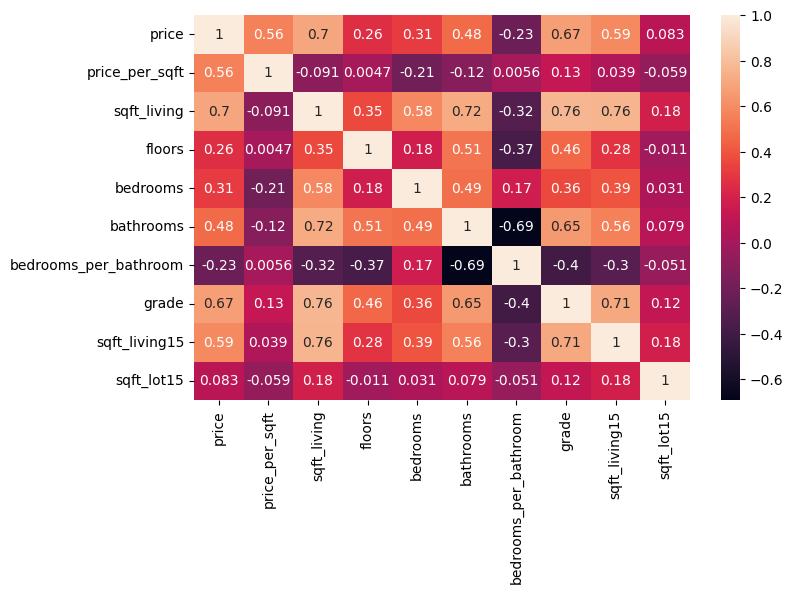

In [33]:
sns.heatmap(df2_num.corr(), annot = True)

It seems that there are very few strong correlations larger than 0.5 in absolute terms. A few notable ones are:

- The larger the living space, the pricier the home. This was to be expected.
- The larger the house, the more bathrooms and bedrooms it has. Also quite expected.
- The larger the house (and the more bathrooms and bedrooms it has), the better the grade
- The grade of the house seems to be correlated to the its price, but not the price/sqft.


The correlation coefficient between house size and the grade seems to be rather high (0.76), meaning that larger houses tend to be graded more highly. Applying the same reasoning of normalizing the price with respect to house size to this situation, the grade was divided by the house area so as to extract the house value compared to other houses of different sizes that may be located in similar or different areas.

In [56]:
df2.eval("grade_per_sqft_norm = (grade/sqft_living)*100", inplace = True)

In [57]:
df2_num = df2[["price","price_per_sqft","sqft_living","floors","bedrooms","bathrooms","bedrooms_per_bathroom","grade","grade_per_sqft_norm","sqft_living15","sqft_lot15"]]

In [58]:
df2_num.corr()["grade_per_sqft_norm"]

price                   -0.438
price_per_sqft           0.312
sqft_living             -0.820
floors                  -0.251
bedrooms                -0.623
bathrooms               -0.635
bedrooms_per_bathroom    0.249
grade                   -0.476
grade_per_sqft_norm      1.000
sqft_living15           -0.595
sqft_lot15              -0.142
Name: grade_per_sqft_norm, dtype: float64

To obtain a categorised grading system, the grade/sq. foot values were separated into 10 different categories so that the new grade range is simillar to the original grade range.

In [59]:
df2["grade_per_sqft_norm"].describe()

count   21597.000
mean        0.421
std         0.145
min         0.089
25%         0.315
50%         0.389
75%         0.500
max         1.538
Name: grade_per_sqft_norm, dtype: float64

In [60]:
df2 = pd.concat([df2,pd.qcut(df2["grade_per_sqft_norm"], q = 10, labels = [1,2,3,4,5,6,7,8,9,10])], axis = 1)

In [61]:
df2.columns.values[-1] = "grade_per_sqft_norm_cat"

A correlation by itself does not always explain the relationship between data. By plotting the relationships, particularly with respect to the price, it is possible to identify some non-linear relationships. That is not apparent by looking at the correlation coefficient alone.

As is evident, only one relationship seems to be curvilinear, namely between the price and the grade/sq.foot. While the relationship itself is moderately strong (-0.44), it is not particularly a relationship of interest such as the one between grade/sq.foot and price/sq.foot, where both the price and grade were normalized by house size.

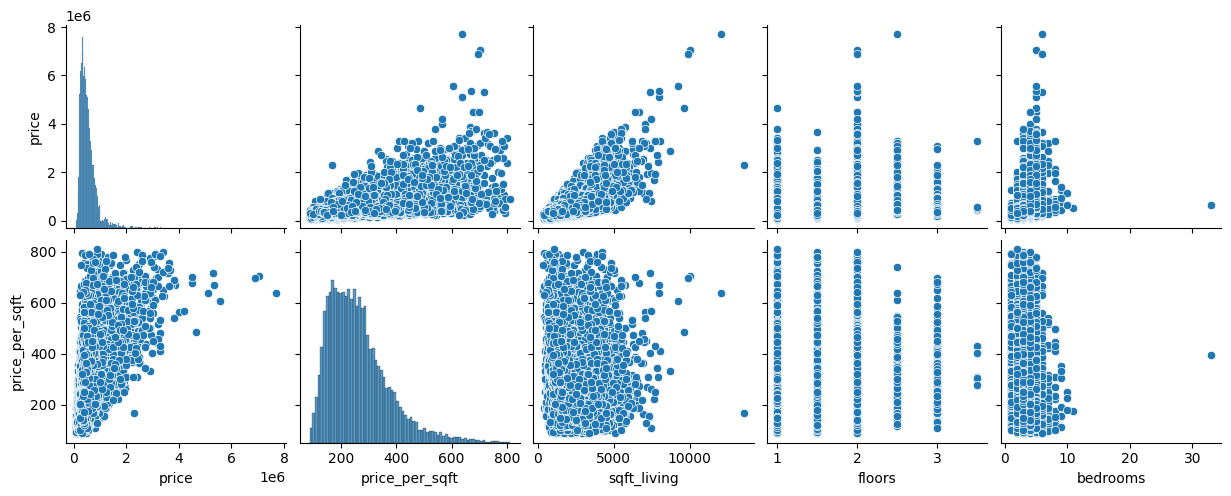

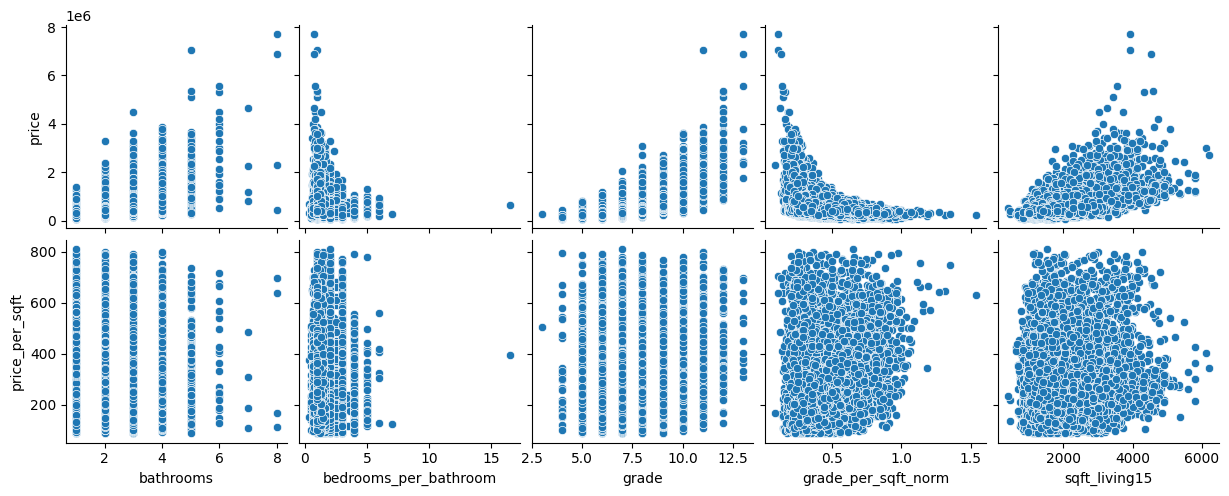

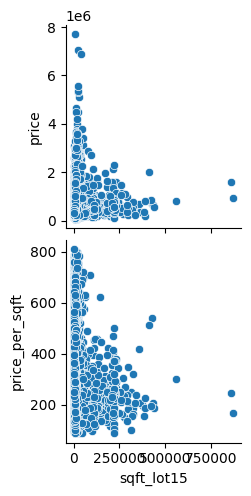

In [40]:
for i in range(0,len(df2_num.columns),5):
    sns.pairplot(data = df2_num, x_vars = df2_num.columns[i:i+5],
            y_vars=["price","price_per_sqft"])

### Dealing with missing data and data cleaning

In order to get a better look at their distributions, all numerical variables are shown in a series histograms below. As is clear, some variables - most notably price and the house size variable "sqft_living" are skewed to the right and have many outliers.

A few houses also tend to have an unreasonably large number of bedrooms and bathrooms. These extreme values are removed.

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'price_per_sqft'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'bedrooms_per_bathroom'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'grade_per_sqft_norm'}>],
       [<Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>, <Axes: >]], dtype=object)

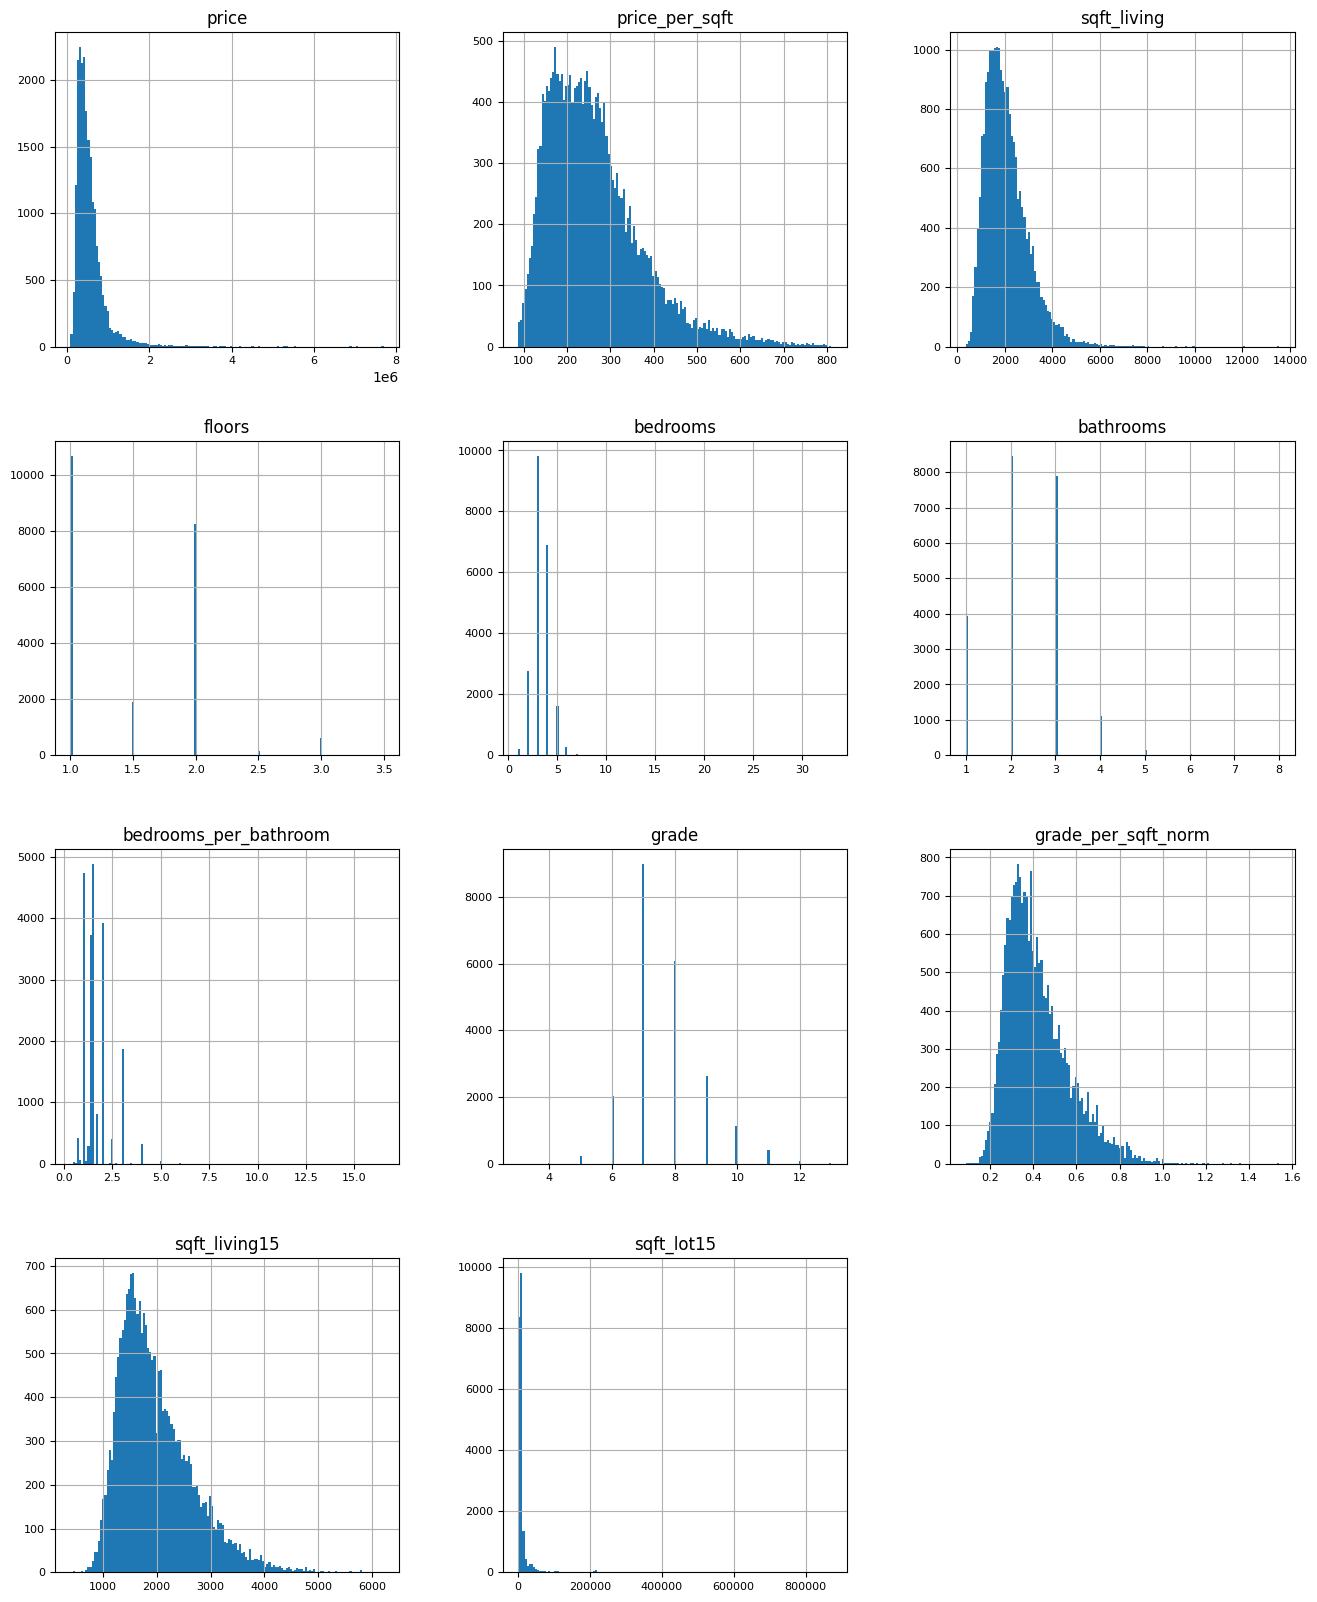

In [41]:
df2_num.hist(figsize = (16,20), bins = round(np.sqrt(len(df2))), xlabelsize=8, ylabelsize=8)

#### 1. Removing extreme values

In [62]:
df2 = df2.query("bedrooms < 7")

#### 2. Imputing missing values

In this step, it was time to deal with the only column that had missing values. In order to do that, the KNNImputer algorithm from Scikit-Learn was used.

Since we are dealing with literal neighbours in this dataset, the lat and long variables can be used to our advantage. Because it utilizes neighbouring data points, KNN is highly suitable for these two features, which were used as input variables to impute the missing values in the waterfront column.

In [63]:
from sklearn.impute import KNNImputer

<Axes: xlabel='long', ylabel='lat'>

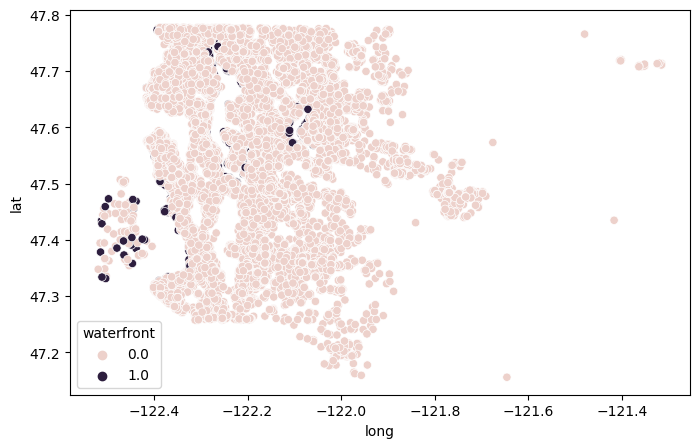

In [64]:
sns.scatterplot(df2, x = "long", y = "lat", hue = "waterfront")

In [65]:
df2_to_impute = df2[["long","lat","waterfront"]]

In [66]:
impute_knn = KNNImputer(n_neighbors=3)

In [67]:
df2_imputed = np.round(impute_knn.fit_transform(df2_to_impute))

In [68]:
df2_imputed = pd.DataFrame(data = df2_imputed, columns=["long","lat","waterfront"])

In [69]:
df2_imputed.waterfront

0       0.000
1       0.000
2       0.000
3       0.000
4       0.000
         ... 
21530   0.000
21531   0.000
21532   0.000
21533   0.000
21534   0.000
Name: waterfront, Length: 21535, dtype: float64

Before the imputation, only 146 known houses had access to a waterfront.

In [70]:
df2_to_impute.waterfront.value_counts()

waterfront
0.000    19003
1.000      146
Name: count, dtype: int64

After the imputation, the number rose only a little, to 153. But more importantly...

In [71]:
df2_imputed.waterfront.value_counts()

waterfront
0.000    21382
1.000      153
Name: count, dtype: int64

...no missing values!

In [72]:
df2_imputed.isna().sum()

long          0
lat           0
waterfront    0
dtype: int64

In [73]:
df2.reset_index(drop = True, inplace = True)

Now the two tables are concatenated and duplicate columns are removed.

In [74]:
df2 = pd.concat([df2, df2_imputed], axis = 1)

In [75]:
df2.columns

Index(['date', 'price', 'waterfront', 'sqft_living', 'floors', 'bedrooms',
       'bathrooms', 'grade', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'zipcode', 'lat', 'long', 'price_per_sqft', 'bedrooms_per_bathroom',
       'neighbourhood', 'price_per_sqft_cat', 'grade_per_sqft_norm',
       'grade_per_sqft_norm_cat', 'long', 'lat', 'waterfront'],
      dtype='object')

In [76]:
df2.columns = ['date', 'price', 'waterfront1', 'sqft_living', 'floors', 'bedrooms',
       'bathrooms', 'grade', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'zipcode', 'lat', 'long', 'price_per_sqft', 'bedrooms_per_bathroom',
       'neighbourhood', 'price_per_sqft_cat', 'grade_per_sqft_norm',
       'grade_per_sqft_norm_cat', 'long1', 'lat1', 'waterfront']
df2.columns

Index(['date', 'price', 'waterfront1', 'sqft_living', 'floors', 'bedrooms',
       'bathrooms', 'grade', 'yr_built', 'sqft_living15', 'sqft_lot15',
       'zipcode', 'lat', 'long', 'price_per_sqft', 'bedrooms_per_bathroom',
       'neighbourhood', 'price_per_sqft_cat', 'grade_per_sqft_norm',
       'grade_per_sqft_norm_cat', 'long1', 'lat1', 'waterfront'],
      dtype='object')

In [77]:
df2.drop(columns=["waterfront1", "lat1","long1"], axis = 1, inplace = True)

In [78]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21535 entries, 0 to 21534
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   date                     21535 non-null  object  
 1   price                    21535 non-null  float64 
 2   sqft_living              21535 non-null  float64 
 3   floors                   21535 non-null  float64 
 4   bedrooms                 21535 non-null  float64 
 5   bathrooms                21535 non-null  int64   
 6   grade                    21535 non-null  int64   
 7   yr_built                 21535 non-null  int64   
 8   sqft_living15            21535 non-null  float64 
 9   sqft_lot15               21535 non-null  float64 
 10  zipcode                  21535 non-null  object  
 11  lat                      21535 non-null  float64 
 12  long                     21535 non-null  float64 
 13  price_per_sqft           21535 non-null  float64 
 14  bedroo

#### Changing variable types

The variable types of two columns were changed. The date column was changed to the datetime type.

The waterfront category was not per se changed, but a new column "waterfront_cat" was created where all 1's belong to a "Yes" category while 0's to a "No" category.

In [79]:
df2["date"] = pd.to_datetime(df2["date"])

In [80]:
df2["waterfront_cat"] = df2["waterfront"].apply(lambda x: "Yes" if x == 1 else "No")

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21535 entries, 0 to 21534
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     21535 non-null  datetime64[ns]
 1   price                    21535 non-null  float64       
 2   sqft_living              21535 non-null  float64       
 3   floors                   21535 non-null  float64       
 4   bedrooms                 21535 non-null  float64       
 5   bathrooms                21535 non-null  int64         
 6   grade                    21535 non-null  int64         
 7   yr_built                 21535 non-null  int64         
 8   sqft_living15            21535 non-null  float64       
 9   sqft_lot15               21535 non-null  float64       
 10  zipcode                  21535 non-null  object        
 11  lat                      21535 non-null  float64       
 12  long                     21535 n

**Now we are ready to test each hypothesis in more detail. Apart from revisiting the regression coefficients for numberical variables, a relationship between categorical and numerical variables was tested as well. In the latter case, the median values of each category were compared to each other. The median was used due to some variables (most notably price) having many outliers.**

### **Hypothesis 1. The larger the sq. footage, the pricier the home**

In [30]:
[f"{i}M" for i in range(9)]

['0M', '1M', '2M', '3M', '4M', '5M', '6M', '7M', '8M']

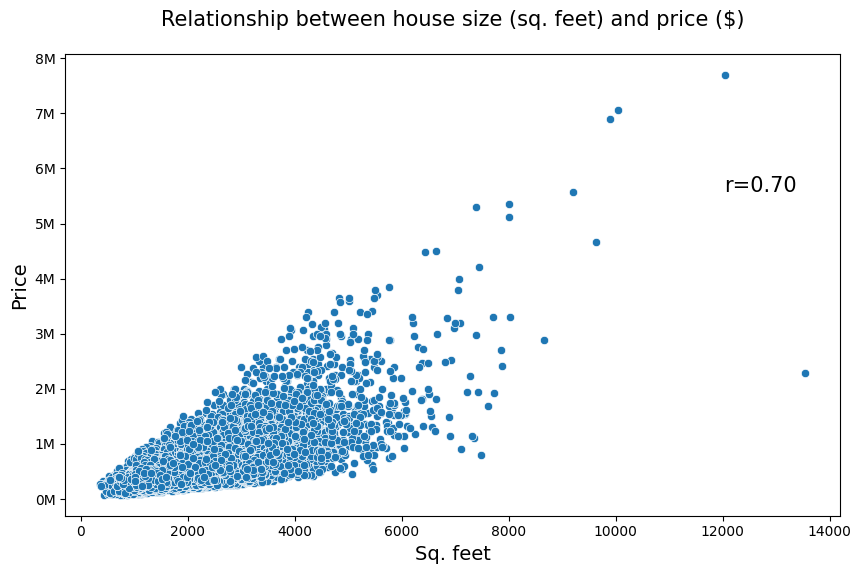

In [41]:
r = np.corrcoef(x = df2["sqft_living"], y = df2["price"])[1][0]
fig, ax = plt.subplots(figsize = (10,6))

g = sns.scatterplot(data = df2, x = "sqft_living", y = "price", ax = ax)
plt.text(0.85, .7, 'r={:.2f}'.format(r), transform=ax.transAxes, size = 15)


g.set_title("Relationship between house size (sq. feet) and price ($)", pad = 20, size = 15)
g.set_xlabel("Sq. feet", size = 14)
g.set_ylabel("Price", size = 14)
g.set_yticklabels([f"{i-1}M" for i in range(10)])

plt.show()

In [63]:
np.corrcoef(x = df2["sqft_living"], y = df2["price"])[1][0]

0.7014299567533516

Yes, generally the higher the area of the home, the higher the price. The relationship seems to be relatively linear, yet heteroscedastic, meaning that the price range among larger houses is relatively big. 


**Insight: The client might able to afford some of the more spacious houses. A lot of the affordable houses seem, however, to be concentrated in suburban areas, which the client does not prefer**

### **Hypothesis 2. The more bedrooms there are, the pricier the home (total and dollars/sq. foot)**

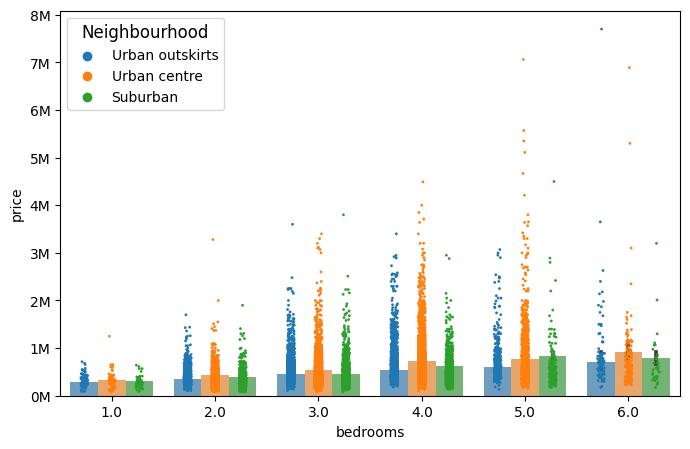

In [85]:
g = sns.stripplot(data = df2, x = "bedrooms", y = "price", hue = "neighbourhood", dodge = True, size=2)
g2 = sns.barplot(data = df2, x = "bedrooms", y = "price", hue = "neighbourhood", alpha = 0.7)

handles, labels = g.get_legend_handles_labels()
g.legend(handles = handles, title = "Neighbourhood", title_fontsize = 12, labels = ["Urban outskirts", "Urban centre","Suburban"])
g.set_yticklabels([f"{i}M" for i in range(9)])

plt.show()

In [65]:
np.corrcoef(x = df2["bedrooms"], y = df2["price"])[1][0]

0.31356624806503186

There seems to be a bigger price range for houses with more rooms, but a clear relationship cannot be established.

**Insight: The client can go for houses that have 3 or 4 bedrooms, many of them should be within his price range, even in more urban areas.**

In [66]:
df2["bedrooms"].value_counts()

bedrooms
3.000    9824
4.000    6882
2.000    2760
5.000    1601
6.000     272
1.000     196
Name: count, dtype: int64

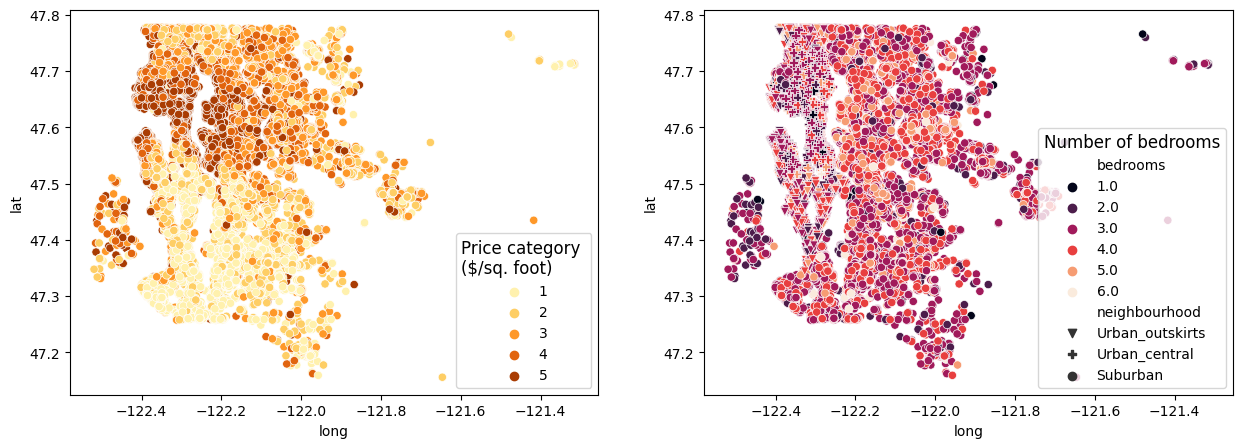

In [67]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

g1 = sns.scatterplot(data = df2, x = "long", y = "lat", hue = "price_per_sqft_cat",palette="YlOrBr", ax = ax[0])
g2 = sns.scatterplot(data = df2, x = "long", y = "lat", hue = "bedrooms",palette="rocket", markers = ["v","P","o"], 
                     style="neighbourhood", ax = ax[1])

g1.legend(title = "Price category \n($/sq. foot)", title_fontsize = 12)

g2.legend(title = "Number of bedrooms", title_fontsize = 12, loc = "lower right")


plt.show()

<Axes: xlabel='bedrooms', ylabel='price_per_sqft'>

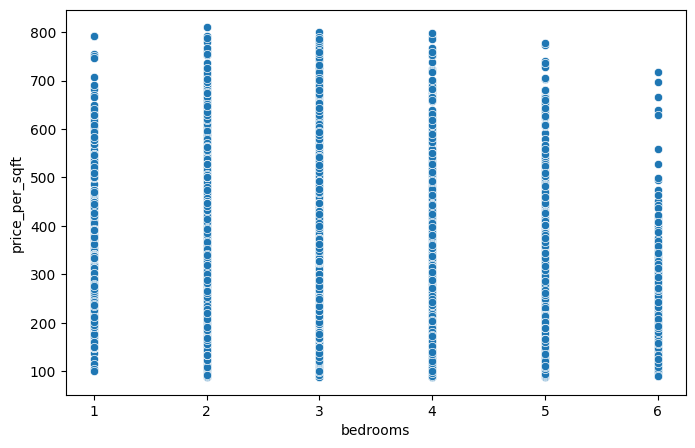

In [68]:
sns.scatterplot(data = df2, x = "bedrooms", y = "price_per_sqft")

In [69]:
np.corrcoef(x = df2["bedrooms"], y = df2["price_per_sqft"])[1][0]

-0.2173372964067137

**There is a negative, yet small correlation between the number of bedrooms and price/per sqft.**

**The number of rooms does not seem to influence the price/sqft.**

### **Hypothesis 3. The more bedrooms per bathrooms there are, the less pricey the home is (total and dollars per sq. foot)**

<Axes: xlabel='bedrooms_per_bathroom', ylabel='price_per_sqft'>

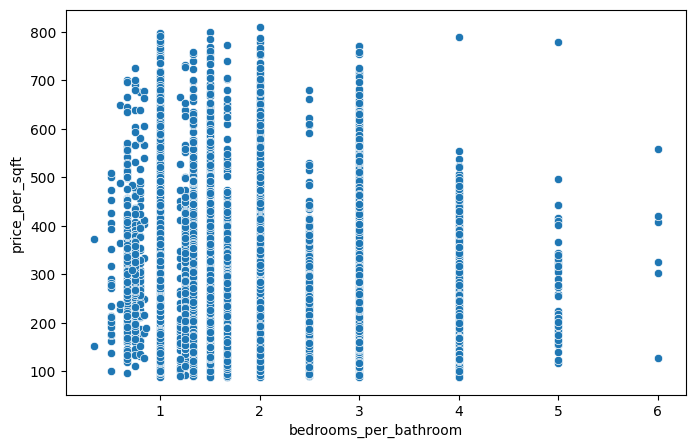

In [70]:
sns.scatterplot(data = df2, x = "bedrooms_per_bathroom", y = "price_per_sqft")

In [71]:
np.corrcoef(x = df2["bedrooms_per_bathroom"], y = df2["price_per_sqft"])[1][0]

0.005862953951074133

**There is no significant relationship between the number of bedrooms/bathroom and the price/sqft.**

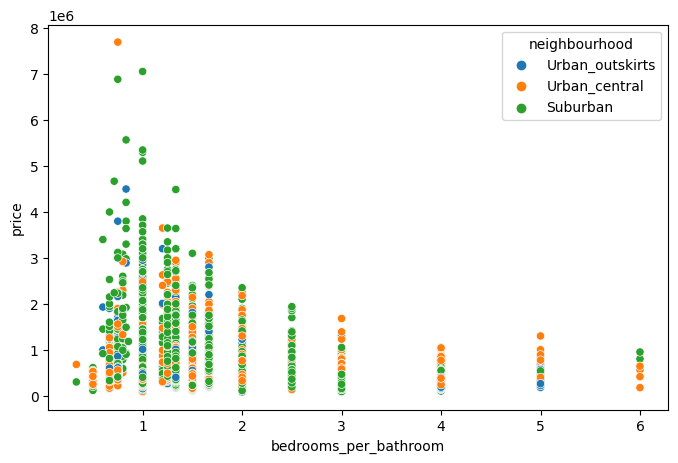

In [72]:
sns.scatterplot(data = df2, x = "bedrooms_per_bathroom", y = "price", hue = "neighbourhood")

plt.show()

In [73]:
np.corrcoef(x = df2["bedrooms_per_bathroom"], y = df2["price"])[1][0]

-0.23380895569098262

There is a negative, yet small correlation between the number of bedrooms per bathroom and price.

**Insight: The number of bedrooms per bathroom does not seem to influence the price, although the lower the bedroom/bathroom ratio, the higher the price range tends to be.**

### **Hypothesis 4. The more central the house, the pricier it is (total and $/sq. foot)**

a. In terms of Zipcode </br>
b. In terms of lat/long

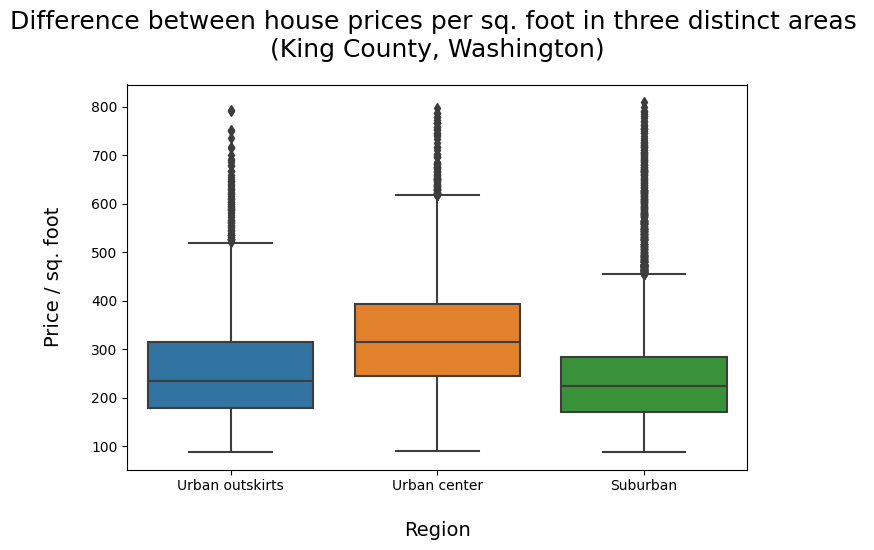

In [74]:
g = sns.boxplot(data = df2, x = "neighbourhood", y = "price_per_sqft")
g.set_xlabel(xlabel="Region", size = 14, labelpad = 20)
g.set_ylabel("Price / sq. foot", size = 14, labelpad = 20)
g.set_xticks(ticks=[0,1,2], labels = ["Urban outskirts","Urban center", "Suburban"])
g.set_title("Difference between house prices per sq. foot in three distinct areas \n(King County, Washington)", pad = 20, size = 18)
plt.show()

In [75]:
df2.groupby("neighbourhood")["price_per_sqft"].median()

neighbourhood
Suburban          223.810
Urban_central     314.750
Urban_outskirts   235.000
Name: price_per_sqft, dtype: float64

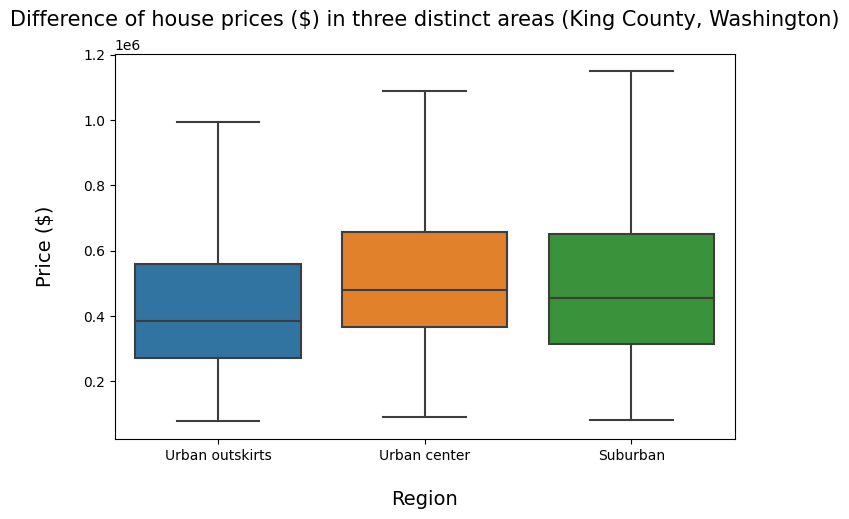

In [76]:
g = sns.boxplot(data = df2, x = "neighbourhood", y = "price", showfliers = False)
g.set_xlabel(xlabel="Region", size = 14, labelpad = 20)
g.set_ylabel("Price ($)", size = 14, labelpad = 20)
g.set_xticks(ticks=[0,1,2], labels = ["Urban outskirts","Urban center", "Suburban"])
g.set_title("Difference of house prices ($) in three distinct areas (King County, Washington)", pad = 20, size = 15)
plt.show()

In [77]:
df2.groupby("neighbourhood")["price"].median()

neighbourhood
Suburban          454625.000
Urban_central     480000.000
Urban_outskirts   385000.000
Name: price, dtype: float64

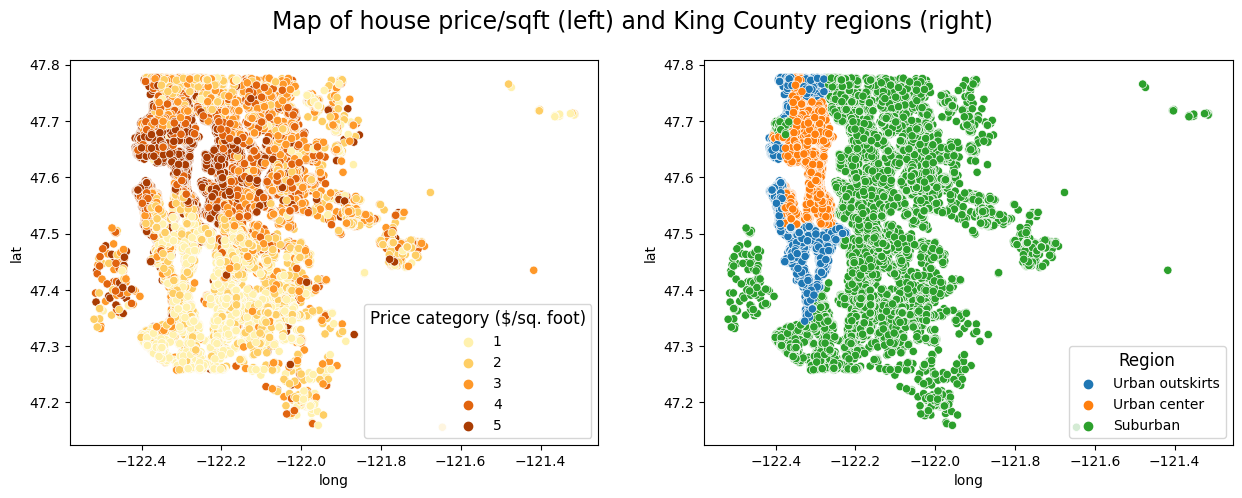

In [78]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

g1 = sns.scatterplot(data = df2, x = "long", y = "lat", hue = "price_per_sqft_cat",palette="YlOrBr", ax = ax[0])
g2 = sns.scatterplot(data = df2, x = "long", y = "lat", hue = "neighbourhood",  ax = ax[1])

g1.legend(title = "Price category ($/sq. foot)", title_fontsize = 12)

handles, labels = g2.get_legend_handles_labels()
g2.legend(handles = handles, title = "Region", title_fontsize = 12, labels = ["Urban outskirts", "Urban center","Suburban"])

fig.suptitle("Map of house price/sqft (left) and King County regions (right)", size = 17)

plt.show()

Yes, the more central the home, the more pricey it seems to be. That is, however, only apparent once the price is normalised by house size.

**Insight: The most expensive houses in terms of price/sq. foot are located in the city center. However, prices/sq. foot are substantially cheaper in the city outskirts, which, based on the location and the isolation factor, may be an attractive area for the client to consider.**

### **Hypothesis 5. If there is a waterfront, the home will be pricier ($/sqft)**


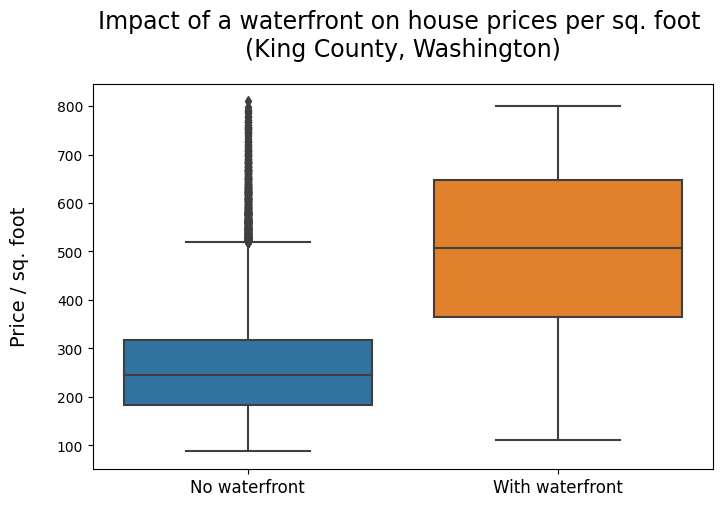

In [79]:
g = sns.boxplot(data = df2, x = "waterfront_cat", y = "price_per_sqft")

g.set_xlabel(" ")
g.set_ylabel("Price / sq. foot", size = 14, labelpad = 20)
g.set_xticks(ticks=[0,1], labels = ["No waterfront","With waterfront"], size=12)
g.set_title("Impact of a waterfront on house prices per sq. foot \n(King County, Washington)", pad = 20, size = 17)
plt.show()

In [80]:
df2.groupby("waterfront_cat")["price_per_sqft"].median()

waterfront_cat
No    244.097
Yes   507.407
Name: price_per_sqft, dtype: float64

In [81]:
df2.groupby("waterfront_cat")["price"].median()

waterfront_cat
No     450000.000
Yes   1380000.000
Name: price, dtype: float64

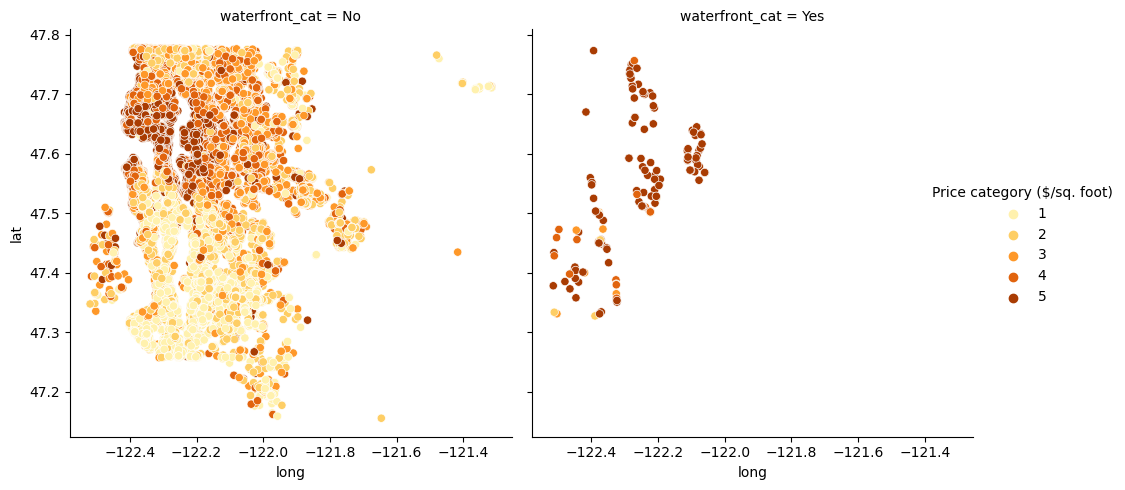

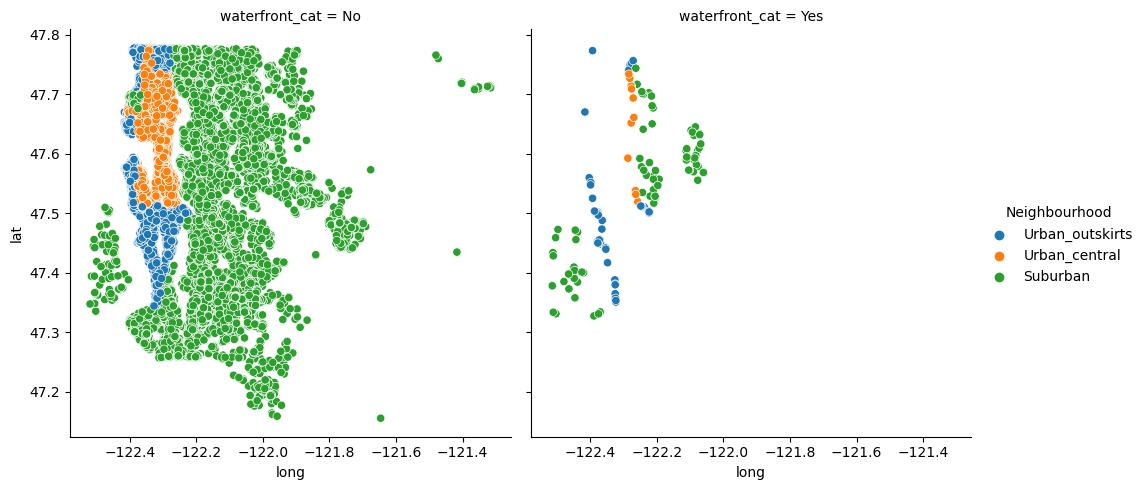

In [82]:
g1 = sns.relplot(data = df2, x = "long", y = "lat", hue = "price_per_sqft_cat",palette="YlOrBr", col = "waterfront_cat")
g2 = sns.relplot(data = df2, x = "long", y = "lat", hue = "neighbourhood", col="waterfront_cat")

g1._legend.set_title("Price category ($/sq. foot)")
g2._legend.set_title("Neighbourhood")

plt.show()

There is an enormous influence of a waterfront on house prices.

**Insight: While the vast majority of houses are most likely out of the client's price range, there do exist some not overly expensive options in the city outskirts towards the south-western part of Seattle.**

### **Hypothesis 6. The older the home, the more central it is but also pricier**

<Axes: xlabel='yr_built', ylabel='price'>

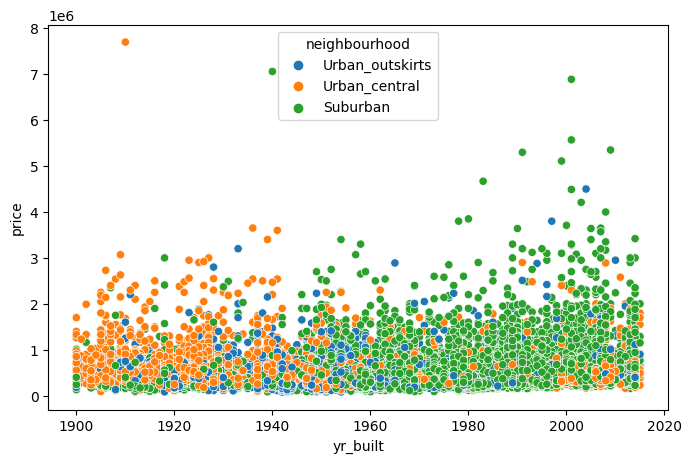

In [83]:
sns.scatterplot(data = df2, x = "yr_built", y = "price", hue = "neighbourhood")

In [84]:
np.corrcoef(x = df2["yr_built"], y = df2["price"])[1][0]

0.05672642753142697

<Axes: xlabel='yr_built', ylabel='price_per_sqft'>

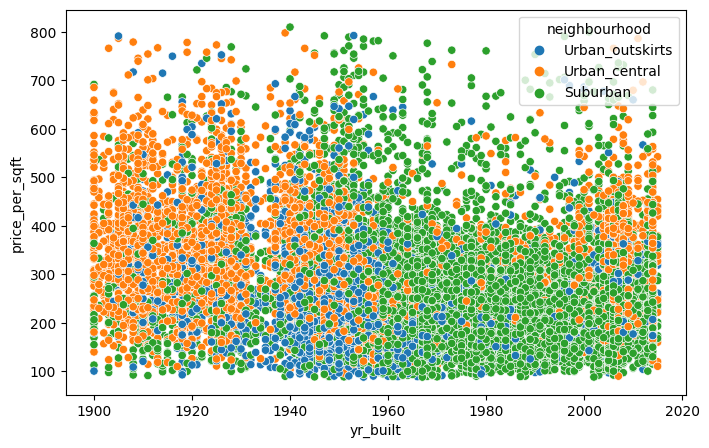

In [85]:
sns.scatterplot(data = df2, x = "yr_built", y = "price_per_sqft", hue = "neighbourhood")

In [86]:
np.corrcoef(x = df2["yr_built"], y = df2["price_per_sqft"])[1][0]

-0.29048684021361515

**The age of the house does not seem to impact the price a lot. Older houses do, however, tend to be concentrated in more urban areas.**

### **Hypothesis 7. Certain areas have better graded homes than others**

In [87]:
df2.groupby("neighbourhood")["grade"].mean()

neighbourhood
Suburban          7.858
Urban_central     7.386
Urban_outskirts   7.264
Name: grade, dtype: float64

<Axes: xlabel='neighbourhood', ylabel='grade'>

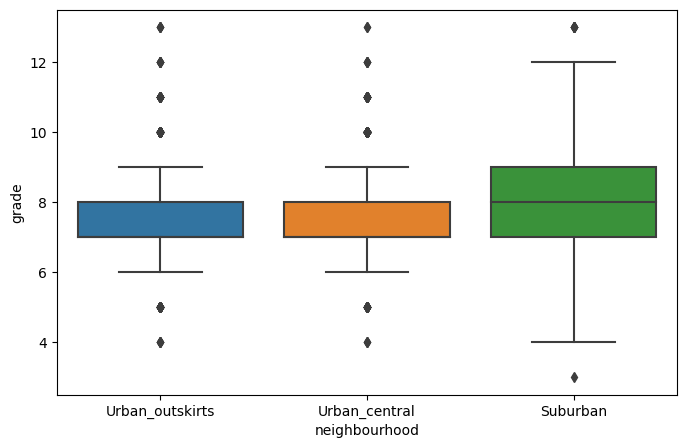

In [88]:
sns.boxplot(df2, x = "neighbourhood", y = "grade")

In [89]:
df2.groupby("neighbourhood")["grade_per_sqft_norm"].mean()

neighbourhood
Suburban          0.391
Urban_central     0.478
Urban_outskirts   0.454
Name: grade_per_sqft_norm, dtype: float64

<Axes: xlabel='neighbourhood', ylabel='grade_per_sqft_norm'>

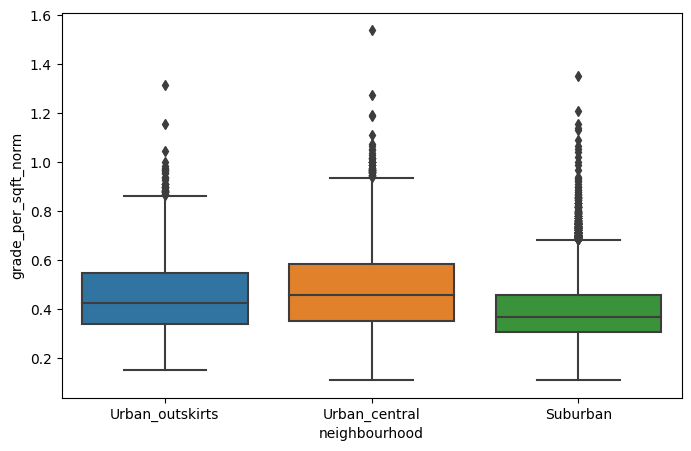

In [90]:
sns.boxplot(df2, x = "neighbourhood", y = "grade_per_sqft_norm")

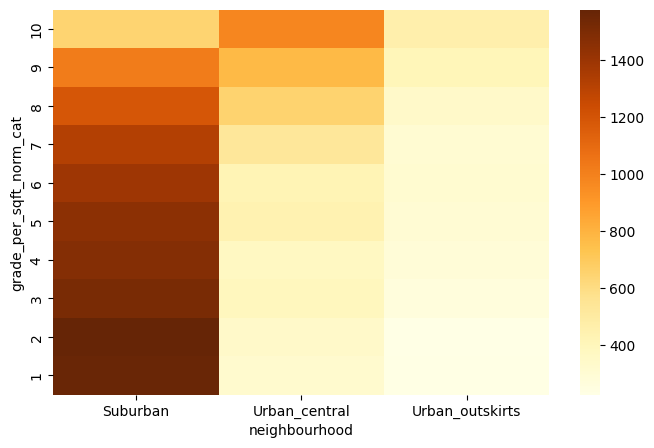

In [91]:
g = sns.heatmap(pd.crosstab(df2["grade_per_sqft_norm_cat"], df2["neighbourhood"]), cmap = "YlOrBr")
g.invert_yaxis()
plt.show()

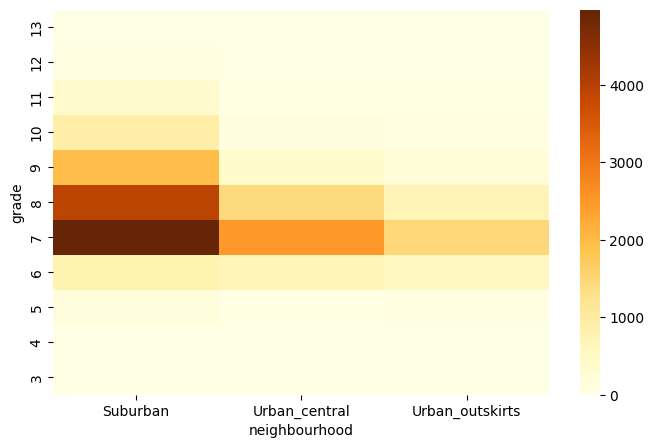

In [92]:
g = sns.heatmap(pd.crosstab(df2["grade"], df2["neighbourhood"]), cmap = "YlOrBr")
g.invert_yaxis()
plt.show()

When the grade is normalised by house size, houses in urban areas, both in the center and on the outskirts, tend to be more highly graded than suburban houses, but not by much.

**Insight: Urban areas, including the outskirts, tend to be better graded and could provide a nicer atmosphere to the residents.**

### **Hypothesis 8. The better the grading, the pricier the home**

<Axes: xlabel='grade_per_sqft_norm_cat', ylabel='price'>

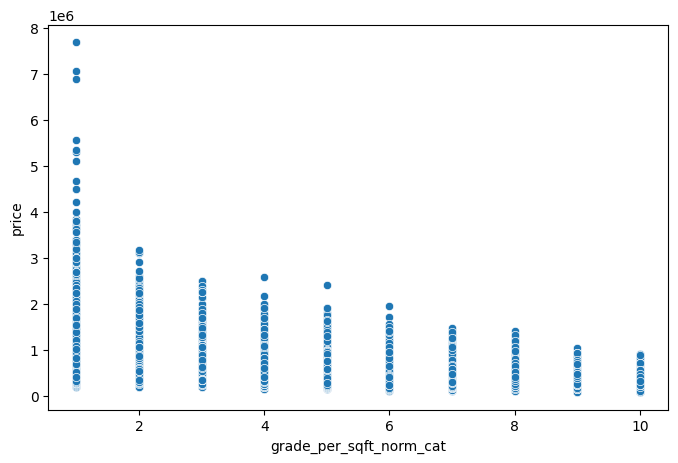

In [93]:
sns.scatterplot(df2, x = "grade_per_sqft_norm_cat", y = "price")

In [94]:
np.corrcoef(df2["grade"],df2["price"])[1][0]

0.6675142171202149

<Axes: xlabel='grade_per_sqft_norm_cat', ylabel='price_per_sqft'>

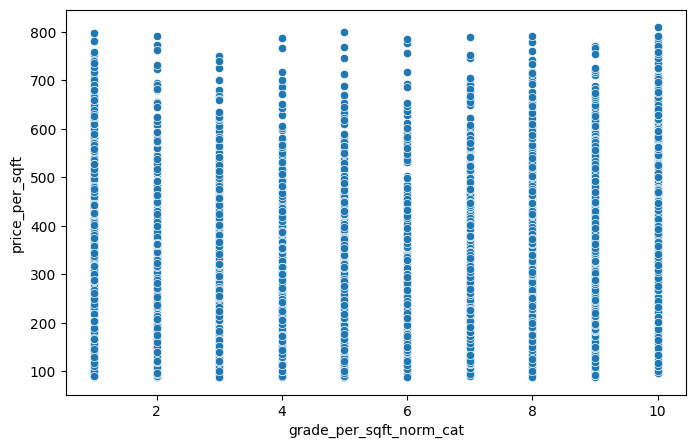

In [95]:
sns.scatterplot(df2, x = "grade_per_sqft_norm_cat", y = "price_per_sqft")

In [96]:
np.corrcoef(df2["grade_per_sqft_norm_cat"],df2["price_per_sqft"])[1][0]

0.25550573169277413

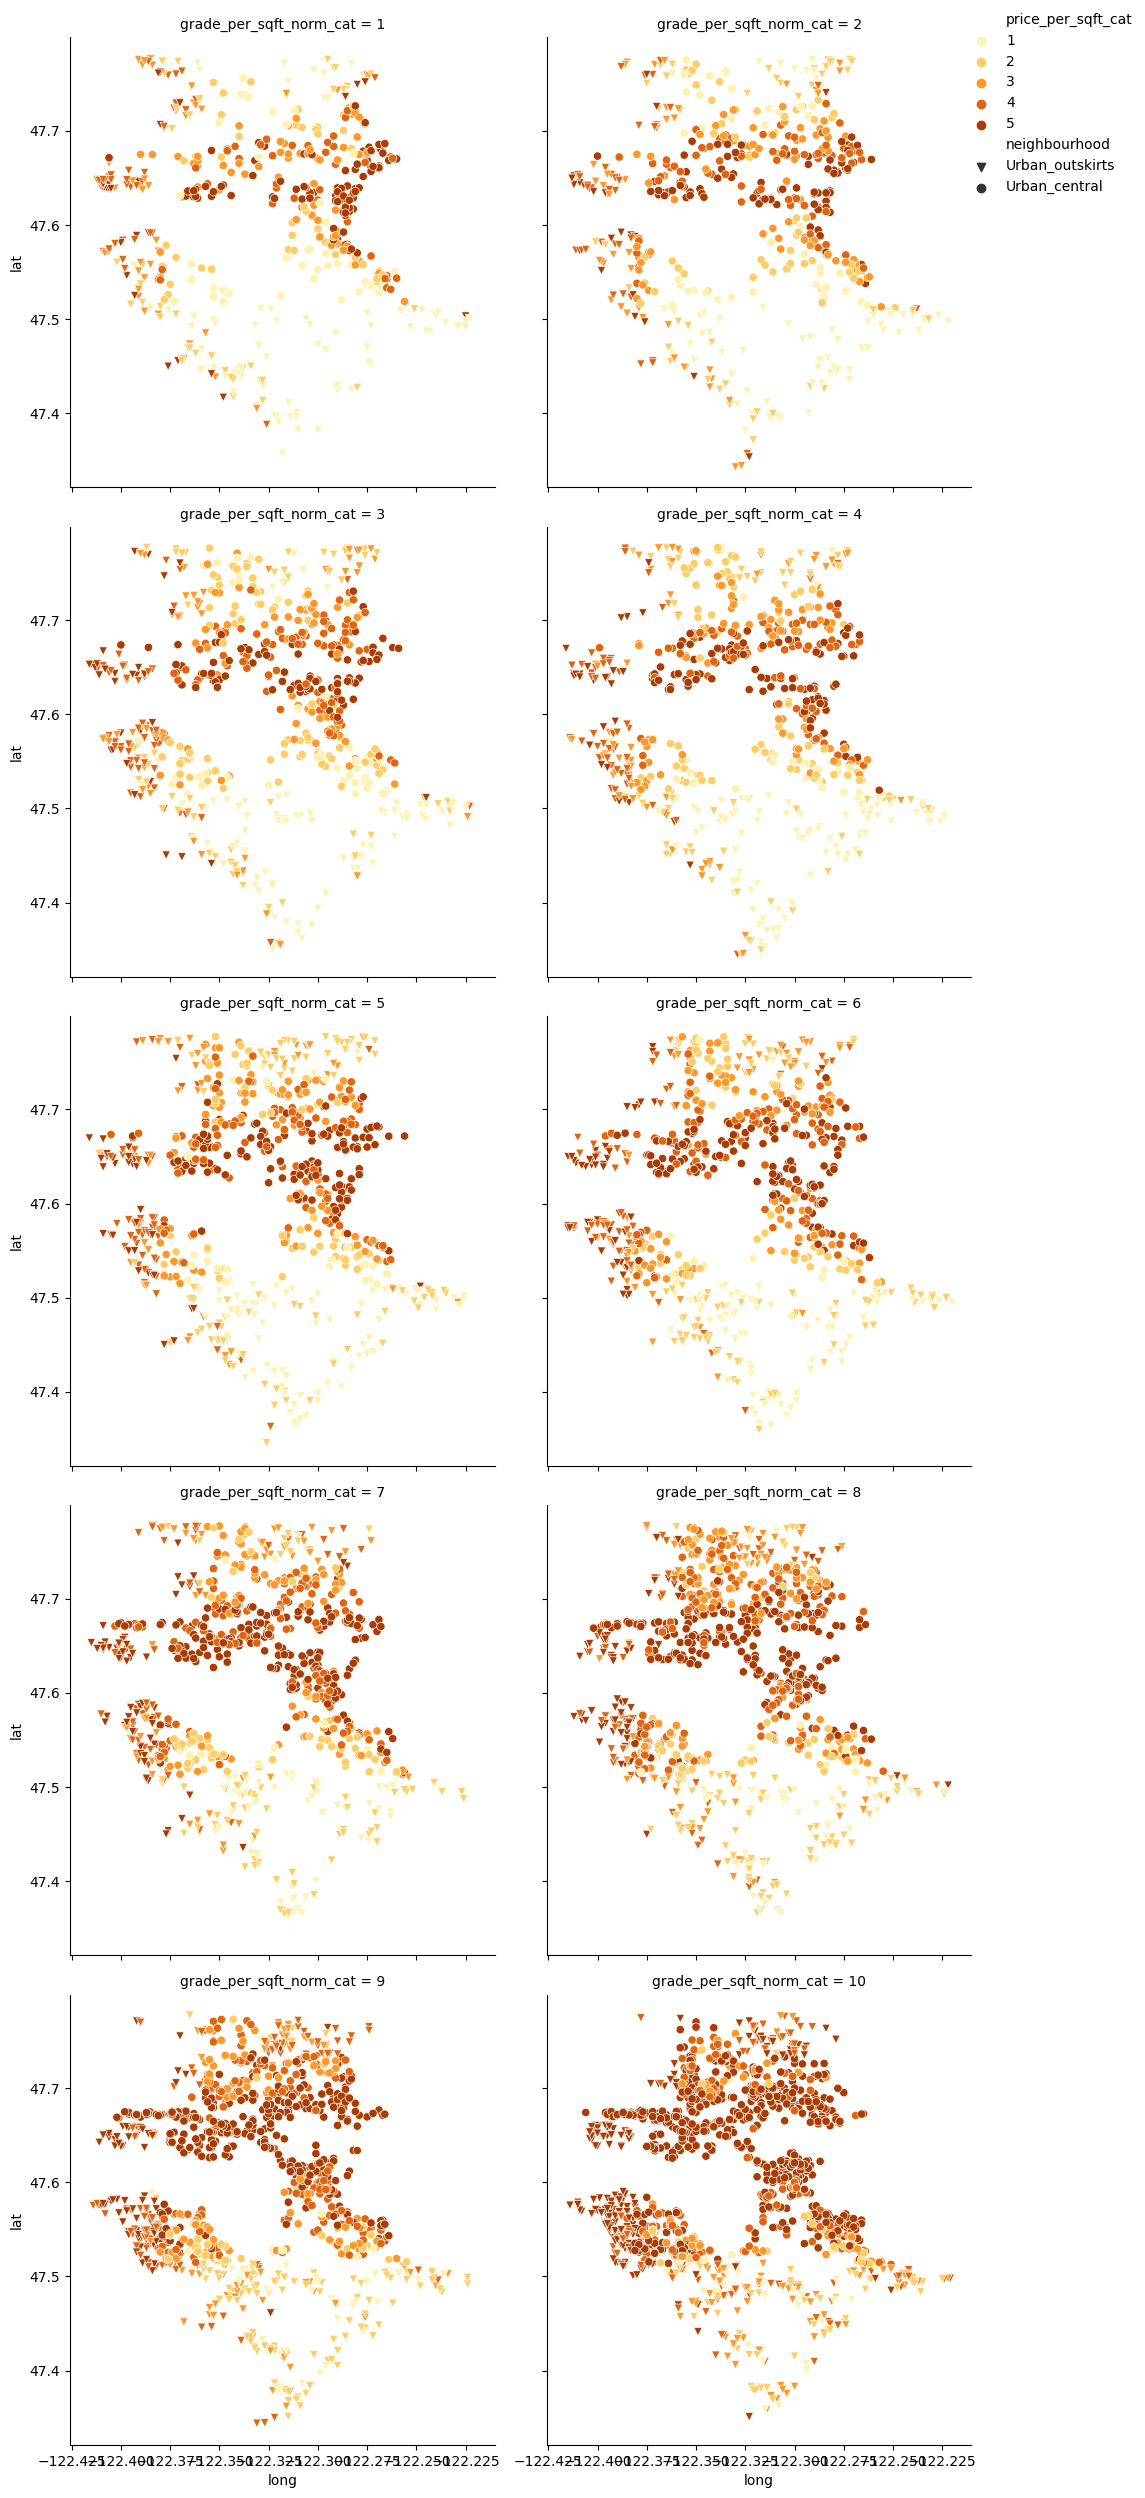

In [97]:
g1 = sns.relplot(data = df2[(df2["neighbourhood"] == "Urban_outskirts") | (df2["neighbourhood"] == "Urban_central")], 
                 x = "long", y = "lat", 
                 hue = "price_per_sqft_cat",palette="YlOrBr", col = "grade_per_sqft_norm_cat", markers = ["v","o"], style="neighbourhood",
                 col_wrap=2)
sns.move_legend(g1,"upper right")
plt.show()

At first there was a significat correlation between the grade of a house and its price. However, since both of these variables correlate highly with the house size, their correlation was checked in a second step by taking the grade and price values normalzed with respect to house size.

Looking at the coefficient and the maps, there seems to be a very slight, but generally non-significant relationship between the house price and its grade.

**Insight: Looking only at the Seattle metropolitan region, the highest graded houses (normalized w.r.t. house size) do tend to have the highest price/sq. foot. Areas on the periphery of the city do provide well-graded yet affordable housing for the client.**

### **Hypothesis 9. The larger the average lot size of the closest 15 neighbours, the more isolated the area**

In [98]:
df2.groupby("neighbourhood")["sqft_lot15"].median()

neighbourhood
Suburban          8610.000
Urban_central     4877.000
Urban_outskirts   7800.000
Name: sqft_lot15, dtype: float64

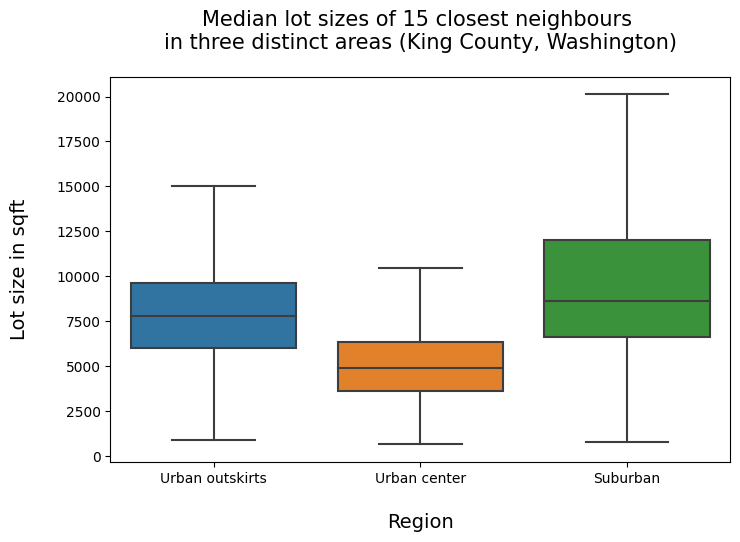

In [99]:
g = sns.boxplot(df2, x = "neighbourhood", y = "sqft_lot15", showfliers = False)

g.set_xlabel(xlabel="Region", size = 14, labelpad = 20)
g.set_ylabel("Lot size in sqft", size = 14, labelpad = 20)
g.set_xticks(ticks=[0,1,2], labels = ["Urban outskirts","Urban center", "Suburban"])
g.set_title("Median lot sizes of 15 closest neighbours \nin three distinct areas (King County, Washington)", pad = 20, size = 15)
plt.show()

In the following step, the goal was to select all urban areas, group them by the zipcode and get the median value of the average lot size of the nearest 15 neighbours for each zip code. 

Then, the top 20% of zipcodes with the highest number of median lot size were selected. The idea is that the higher the median lot size in a neighbourhood, the more isolated and relaxed the area will be. 

In [100]:
df2[df2["zipcode"].str.startswith("981")].groupby("zipcode")["sqft_lot15"].median().sort_values(ascending = False).reset_index()

zipcode  sqft_lot15
0    98166   10751.000
1    98188    9371.500
2    98168    9078.000
3    98148    8825.000
4    98155    8643.000
5    98177    8258.000
6    98198    8136.000
7    98146    8100.000
8    98125    7560.000
9    98133    7550.500
10   98178    7200.000
11   98136    5700.000
12   98199    5537.000
13   98118    5365.000
14   98115    5243.000
15   98108    5233.500
16   98116    5140.000
17   98106    5080.000
18   98126    5040.000
19   98117    4700.000
20   98112    4500.000
21   98105    4200.000
22   98144    4000.000
23   98107    3888.000
24   98103    3850.000
25   98122    3750.000
26   98119    3600.000
27   98109    3600.000
28   98102    3210.000

In [101]:
df2[df2["zipcode"].str.startswith("981")].groupby("zipcode")["sqft_lot15"].median().sort_values().reset_index()["sqft_lot15"].quantile(0.8)

8184.8

In [102]:
df2["zipcode_q0.8_sqft_lot15"] = df2["zipcode"].apply(lambda x: "Yes" if x in ["98166", "98188", "98168","98148", 
                                                                               "98155","98177","98198","98146"] else "No")

In the map below, the median lot size in the top 20% of the neighbourhoods was plotted based on location.

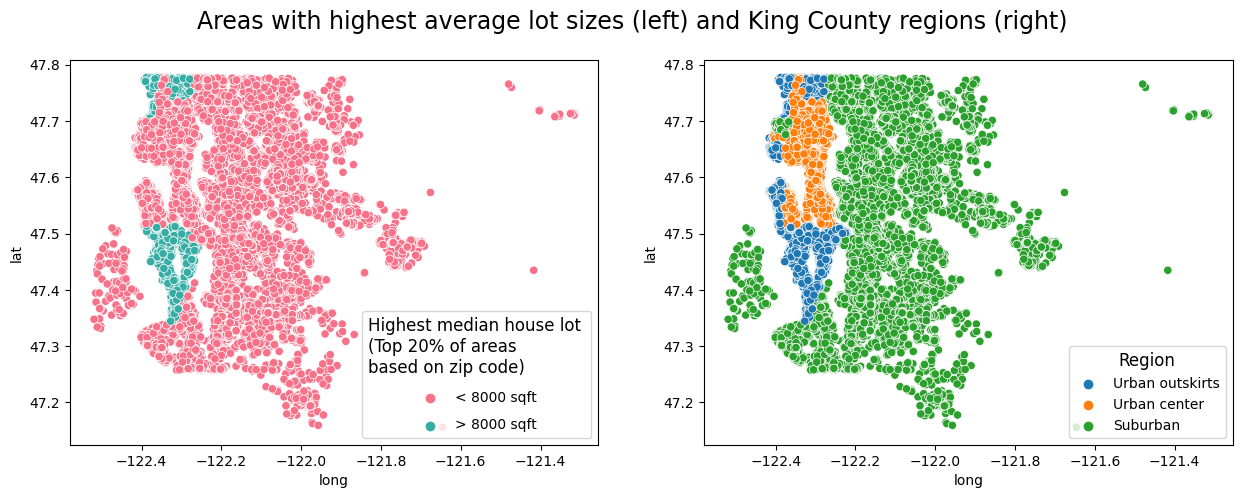

<Figure size 800x500 with 0 Axes>

In [110]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

g1 = sns.scatterplot(data = df2, x = "long", y = "lat", hue = "zipcode_q0.8_sqft_lot15", palette = "husl", ax = ax[0])
g2 = sns.scatterplot(data = df2, x = "long", y = "lat", hue = "neighbourhood",  ax = ax[1])

handles, labels = g1.get_legend_handles_labels()
g1.legend(handles = handles, title_fontsize = 12, labelspacing = 1, title = "Highest median house lot \n(Top 20% of areas \nbased on zip code)",
          labels = ["< 8000 sqft","> 8000 sqft"])    

handles, labels = g2.get_legend_handles_labels()
g2.legend(handles = handles, title = "Region", title_fontsize = 12, labels = ["Urban outskirts", "Urban center","Suburban"])

plt.suptitle("Areas with highest average lot sizes (left) and King County regions (right)", size = 17)

plt.show()

The lotsize of the closest 15 neighbours varies quite a bit, especially between the suburban/urban outskirts areas and urban center areas.

**Insight: The larger the general lot size in a neighbourhood, the more quiet and less busy it is. Seattle's periphery seems to provide a good mix between an isolated, yet urban area.**

### **10. The smaller the average home area of the closest 15 neighbours, the fewer kids they'll have, the more central it is**

In [104]:
df2.groupby("neighbourhood")["sqft_living15"].median()

neighbourhood
Suburban          2060.000
Urban_central     1570.000
Urban_outskirts   1640.000
Name: sqft_living15, dtype: float64

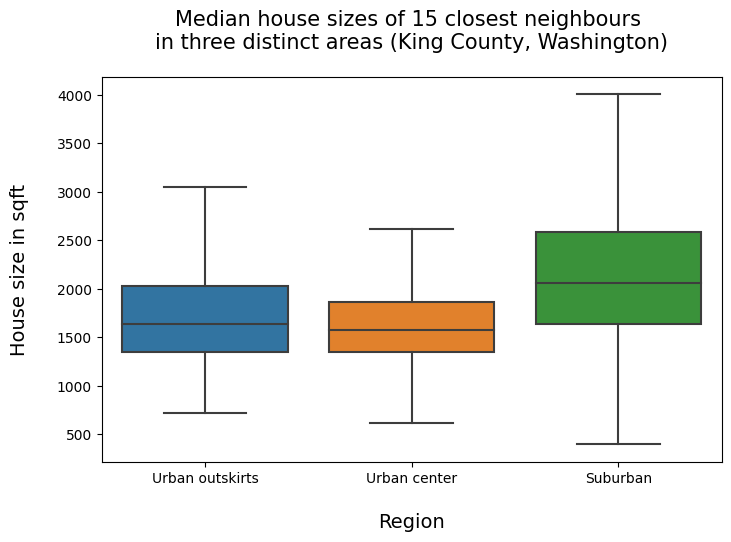

In [105]:
g = sns.boxplot(df2, x = "neighbourhood", y = "sqft_living15", showfliers = False)

g.set_xlabel(xlabel="Region", size = 14, labelpad = 20)
g.set_ylabel("House size in sqft", size = 14, labelpad = 20)
g.set_xticks(ticks=[0,1,2], labels = ["Urban outskirts","Urban center", "Suburban"])
g.set_title("Median house sizes of 15 closest neighbours \nin three distinct areas (King County, Washington)", pad = 20, size = 15)
plt.show()


In the following step, the goal was to select all urban areas, group them by the zipcode and get the median value of the average house size of the nearest 15 neighbours for each zip code. 

In the next step, the bottom 20% of zipcodes with the lowest number of median house sizes were selected. The idea is that the smaller the median house size in a neighbourhood, the fewer families will live there. 

In [106]:
df2[df2["zipcode"].str.startswith("981")].groupby("zipcode")["sqft_living15"].median().sort_values().reset_index()

zipcode  sqft_living15
0    98106       1320.000
1    98126       1395.000
2    98168       1430.000
3    98146       1440.000
4    98117       1480.000
5    98103       1500.000
6    98107       1500.000
7    98133       1500.000
8    98108       1505.000
9    98118       1540.000
10   98148       1540.000
11   98125       1570.000
12   98144       1580.000
13   98122       1590.000
14   98188       1590.000
15   98116       1600.000
16   98155       1610.000
17   98198       1630.000
18   98136       1630.000
19   98115       1640.000
20   98178       1650.000
21   98119       1760.000
22   98102       1780.000
23   98199       1810.000
24   98109       1845.000
25   98105       1850.000
26   98166       1850.000
27   98112       2050.000
28   98177       2110.000

In [107]:
df2[df2["zipcode"].str.startswith("981")].groupby("zipcode")["sqft_living15"].median().sort_values().reset_index()["sqft_living15"].quantile(0.2)

1500.0

In [108]:
df2["zipcode_q0.2_sqft_living15"] = df2["zipcode"].apply(lambda x: "Yes" if x in ["98106", "98126", "98168","98146", "98117","98103","98107"] else "No")

In the map below, the median house size in the bottom 20% of the neighbourhoods was plotted based on location.

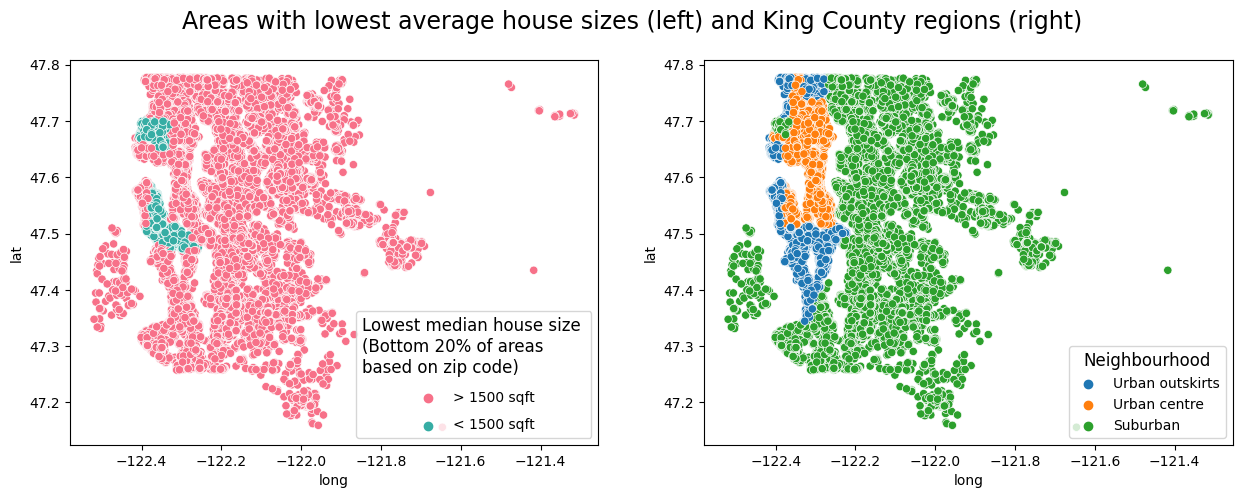

<Figure size 800x500 with 0 Axes>

In [111]:
fig, ax = plt.subplots(1,2, figsize = (15,5))

g1 = sns.scatterplot(data = df2, x = "long", y = "lat", hue = "zipcode_q0.2_sqft_living15", palette = "husl", ax = ax[0])
g2 = sns.scatterplot(data = df2, x = "long", y = "lat", hue = "neighbourhood",  ax = ax[1])

handles, labels = g1.get_legend_handles_labels()
g1.legend(handles = handles, title_fontsize = 12, labelspacing = 1, title = "Lowest median house size \n(Bottom 20% of areas \nbased on zip code)",
          labels = ["> 1500 sqft","< 1500 sqft"])    

handles, labels = g2.get_legend_handles_labels()
g2.legend(handles = handles, title = "Neighbourhood", title_fontsize = 12, labels = ["Urban outskirts", "Urban centre","Suburban"])

plt.suptitle("Areas with lowest average house sizes (left) and King County regions (right)", size = 17)

plt.show()

**Insight: While most areas with the lowest median house size seem to be concentrated in Seattle's center, there are still a few neighbourhoods located on the city outskirts that seem to have relatively small housing units. Considering the price in these areas tends to be lower, these peripheral neighbourhoods can be an attractive solution for the client.** 